In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [8]:
#Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DIPLOM/HR.csv')

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Для возможности анализа и зарплаты переведем значения в порядковые
df['salary'] = df['salary'].replace('low', 0)
df['salary'] = df['salary'].replace('medium', 1)
df['salary'] = df['salary'].replace('high', 2)


2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные

In [ ]:
print (len(df['satisfaction_level'].unique()),'\n')
print (len(df['last_evaluation'].unique()),'\n')
print (len(df['average_montly_hours'].unique()))

92 

65 

215


In [ ]:
# Все параметры дискретные (кроме "департамента"), три из них  - колличественные. Для них посчитаем корреляцию по Пирсону, а для всех по Спирмену и Кенделл.

df[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].corr()


,satisfaction_level,last_evaluation,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.020048
last_evaluation,0.105021,1.000000,0.339742
average_montly_hours,-0.020048,0.339742,1.000000


In [ ]:
df.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306,0.045381
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167,-0.009117
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960,0.004453
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951,0.002452
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205,0.001274
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245,0.008496
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788,-0.152266
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000,0.094273
salary,0.045381,-0.009117,0.004453,0.002452,0.001274,0.008496,-0.152266,0.094273,1.000000


average_montly_hours number_project          
last_evaluation left

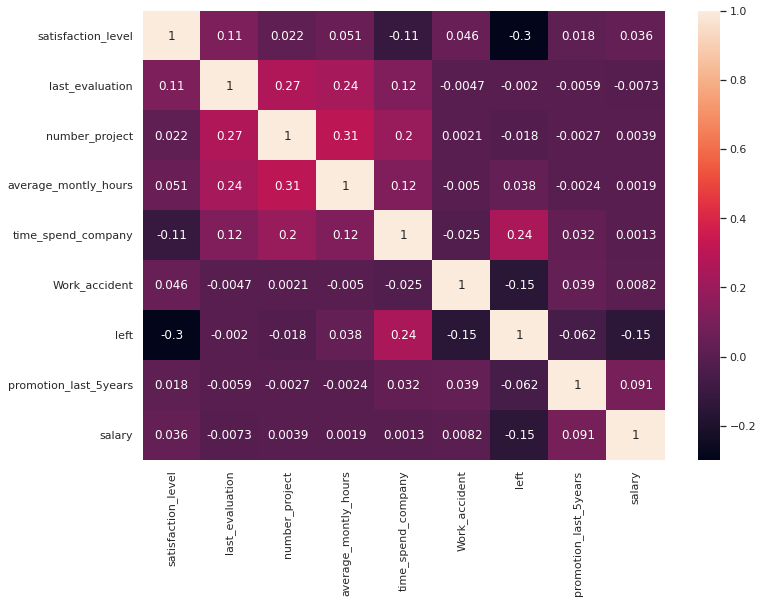

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(method='kendall'), annot=True)

left  satisfaction_level

time_spend_company Work_accident

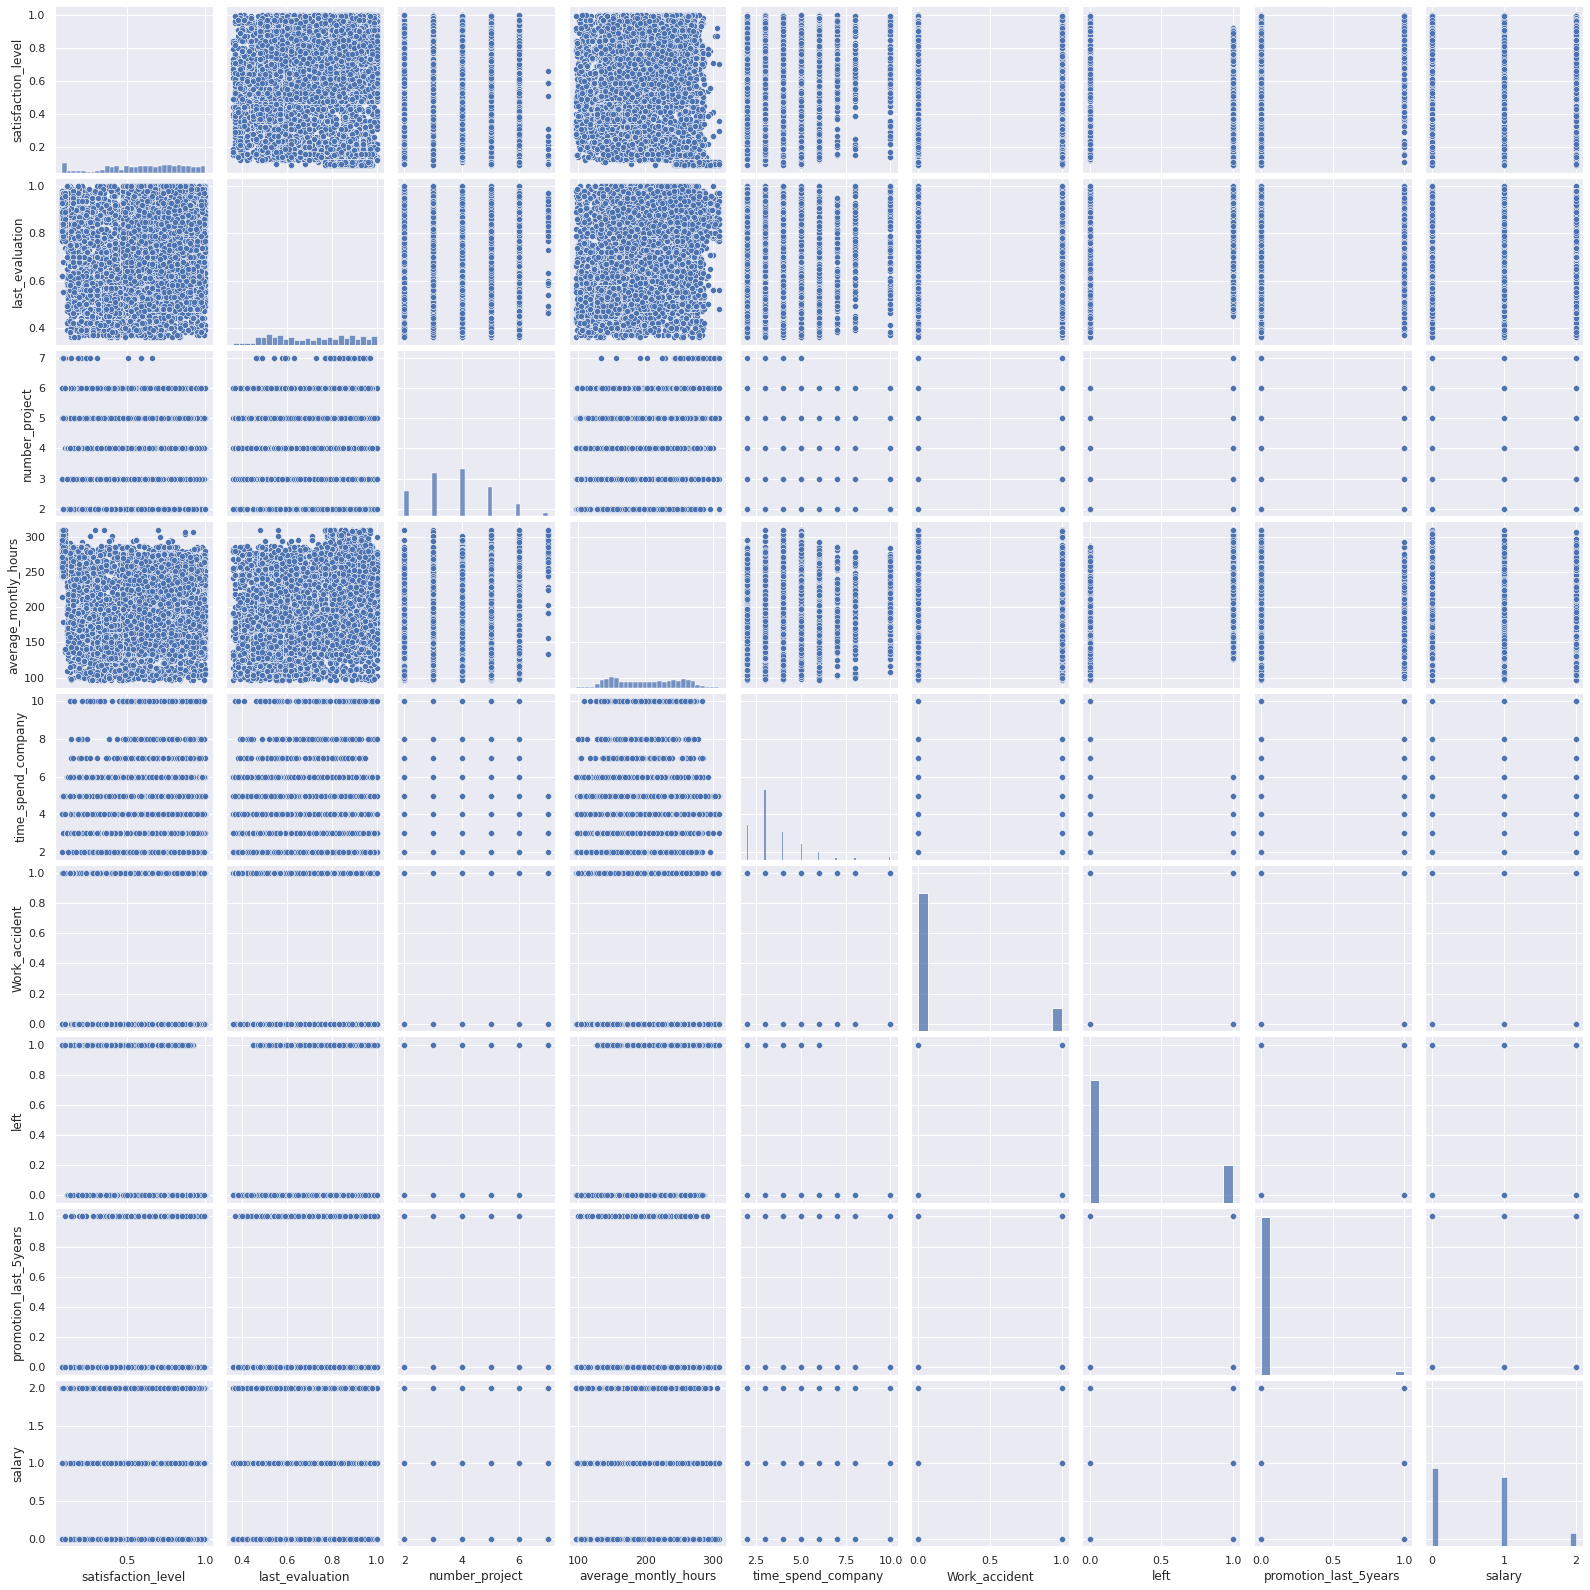

In [ ]:
sns.pairplot(df)

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
df.groupby('department').count()['salary'].sort_values()

department
management      630
hr              739
accounting      767
RandD           787
marketing       858
product_mng     902
IT             1227
support        2229
technical      2720
sales          4140
Name: salary, dtype: int64

5. Показать распределение сотрудников по зарплатам.

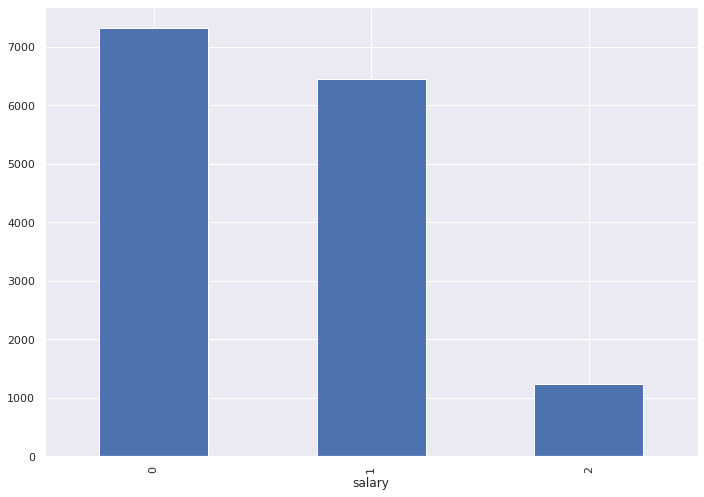

In [ ]:
s = df.groupby('salary').count()['left']
#plt.hist(df.groupby('salary').count()['left'])
s.plot(kind='bar')

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df.pivot_table(index = 'salary', columns = 'department', values = 'left', aggfunc = 'count').head()


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
0,609,364,358,335,180,402,451,2099,1146,1372
1,535,372,335,359,225,376,383,1772,942,1147
2,83,51,74,45,225,80,68,269,141,201


In [ ]:
len(df.loc[(df.salary==0)])# & (df.department=='accounting')])

7316

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимо кладом

In [ ]:
s_low = df[df.salary==0]['average_montly_hours']
s_low.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [ ]:
s_high = df[df.salary==2]['average_montly_hours']
s_high.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [ ]:
# H0 - среднее время работы выборки сотрудников с высоким и низким окладом одинаковы
# H1 - среднее время работы выборки сотрудников с низким окладом выше чем с высоким
alpha = 0.05
result = st.ttest_ind(s_low, s_high, equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу, время работы не зависит от оклада.')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, время работы не зависит от оклада.


8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
- Доля сотрудников с повышением за последние 5 лет

In [ ]:
t1 = round(100*len(df[(df.left == 0) & (df.promotion_last_5years == 1)]) / len(df[(df.left == 0)]),1)
t2 = round(100*len(df[(df.left == 1) & (df.promotion_last_5years == 1)]) / len(df[(df.left == 1)]),1)
print (f"Доля действующих {t1}% и уволенных {t2}% сотрудников с повышением.")

Доля действующих 2.6% и уволенных 0.5% сотрудников с повышением


- Средняя степень удовлетворенности

In [ ]:
print ("Действующие: {:2.2f}, уволенные: {:2.2f}".format(df[df.left==0]['satisfaction_level'].mean(), df.groupby('left')['satisfaction_level'].mean()[1]))

Действующие: 0.67, уволенные: 0.44


- Среднее количество проектов

In [ ]:
df.groupby('left')['number_project'].mean()
# 0 - действующие, 1 - уволенные сотрудники

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

9. Разделить данные на тестовую и обучающую выборки. 
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборки

In [ ]:
df2 = df.copy()
df2.drop(['department', 'salary', 'left'], axis=1, inplace=True)
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,0
4,0.37,0.52,2,159,3,0,0,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0
14995,0.37,0.48,2,160,3,0,0,0
14996,0.37,0.53,2,143,3,0,0,0
14997,0.11,0.96,6,280,4,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, df['left'], test_size=0.30, random_state=42)
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
13388    0
10463    0
5331     0
7499     0
11796    0
Name: left, Length: 4500, dtype: int64

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
6723,0.65,0.96,5,226,2,1,0,1
6473,0.88,0.80,3,166,2,0,0,0
4679,0.69,0.98,3,214,2,0,0,0
862,0.41,0.47,2,154,3,0,0,0
7286,0.87,0.76,5,254,2,1,0,0
...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,1
10463,0.21,0.43,2,249,3,0,0,0
5331,0.78,0.53,3,156,3,0,0,0
7499,0.93,0.58,5,238,2,0,0,1


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза

result = pd.DataFrame(y_test)
result['Result'] = lda.predict(X_test)
result


,left,Result
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
13388,0,0
10463,0,1
5331,0,0
7499,0,0


In [ ]:
len(result[result.left != result.Result])

1035

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

"{:.2%}".format(accuracy_score(result['left'], result['Result']))

'77.00%'